# The Perceptron Learning Algorithm

## Introduction

In this notebook I will use the *Bank Note Authentication* data to apply a single neuron *perceptron* model. This model is a single layer neuron  algorithm designed for binary classification tasks. It uses a vector of input features and maps it to a scalar output.

 The neural networks approach like perceptron are inspired from biology. In biology, a neuron receives sensory information via dendrites in the form of electrical or chemical signals that either excite or inhibit actions. These signals are summed up and passed along to the axon. Using a threshold value, the axon terminals then transform the axon's signal into either an excitatory or inhibitory signal.
    
<img src="Image/neuron.png" alt="Drawing" style="width: 500px;"/>



The implementation of perceptron involves 4 components:

* Input vectors: Feature sets fed into the perceptron.
* Weights and bias: Parameters that adjust the influence of inputs.
* Weighted sum: Calculated total of weighted inputs and bias.
* Activation function: Determines the perceptron’s output based on the weighted sum.

<img src="Image/perceptron.jpeg" alt="Drawing" style="width: 500px;"/>

### Weighted Sum

Considering the bias, the weighted sum $\sum$ multiplies all inputs of $X$ by weight $w$ and then adds them up.

$$\sum = w^T \bar X^i=w_1X^i_1+w_2X^i_2+...+w_nX^i_n+b\cdot 1.0$$
where $b$ is the bias and 
$$\bar X^i=\begin{bmatrix}
X^i_1\\ 
\vdots\\ 
X^i_n \\ 
1.0
\end{bmatrix}$$

### Activation Function

The activation function is used to convert perceptron output. There are some functions can be used as activation function in the perceptron learning algorithm, e.g., step function, and sign function, etc,.

In our algorithm, we will use sign function.

$$\hat y^i=sign(w^T \bar X^i)=\left\{\begin{matrix}
1, \space\space w^T\bar X^i>0\\ 
-1,\space\space w^T\bar X^i<0
\end{matrix}\right.$$

<img src="Image/activation.png" alt="Drawing" style="width: 500px;"/>


### Loss Function

In the perceptron learning algorithm, it is free to choose the loss function, e.g., $L(w)=\sum_{i=1}^n (\hat y_i-y^i)$.

In our algorithm, we will use

$$L(w, \bar X^i)=\frac{1}{2}\sum_{i=1}^n(\hat y^i-y^i)^2 = \frac{1}{2}\sum_{i=1}^n\left (sign(w^T \bar X^i)-y^i\right)^2$$

The **stochastic gradient descent** will be used to optimize the algorithm. Since the sign function cannot be derived, we use an **approximate** gradient of the loss fuction $\triangledown L(w, \bar X_i)$ that

$$\triangledown L(w, \bar X^i)=\left (sign(w^T \bar X^i)-y^i\right)\bar X_i$$

And thus, to update the weights,

$$w_{n+1}=w_n - \alpha \triangledown L(w, \bar X^i)$$
where $\alpha$ is the learning rate.

#### Epoch

The number of epochs represents a hyperparameter that specifies how often the learning algorithm will process the entire training dataset. Each epoch ensures that every sample in the dataset can contribute to updating the model’s internal parameters. Generally, the number of epochs is set to a large value, often ranging from hundreds to thousands, enabling the learning process to continue until the error of the model is reduced.


---

## Implement

In the subsequent sections of this notebook, I will use the perceptron algorithm to classify banknotes into two categories—genuine and fake, using the [BankNote Authentication dataset](https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data).

### About the dataset

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

 


### Task

The goal is to categorize bank notes into two groups (genuine and fake) based on their feature measures.

To accomplish this, I'll first create scatter plots for all feature measures to identify the predictors.

Using these predictors, I will then classify the banknotes, predicting "1" for genuine and "0" for fake currencies.

For this task, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [seaborn](https://seaborn.pydata.org/)


In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Set the Seaborn theme
sns.set_theme()

### Data Exploration

In [4]:
# Load the banknote dataset 
data = pd.read_csv("Data/BankNote_Authentication.csv")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


To avoid confusion rename class variable to label.

In [5]:
# Rename class variable 
data.rename(columns = {'class':'label'}, inplace = True)

data.head()

,variance,skewness,curtosis,entropy,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
data.shape

(1372, 5)

In [16]:
# Store the class values in the numpy array y
y = data.label.values
# Converting each entry of y with 0 to -1 and otherwise 1
y = np.where(y == 0, -1, 1)

# Store the feature measurements in the matrix X
X = data[["variance", "curtosis"]].values

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

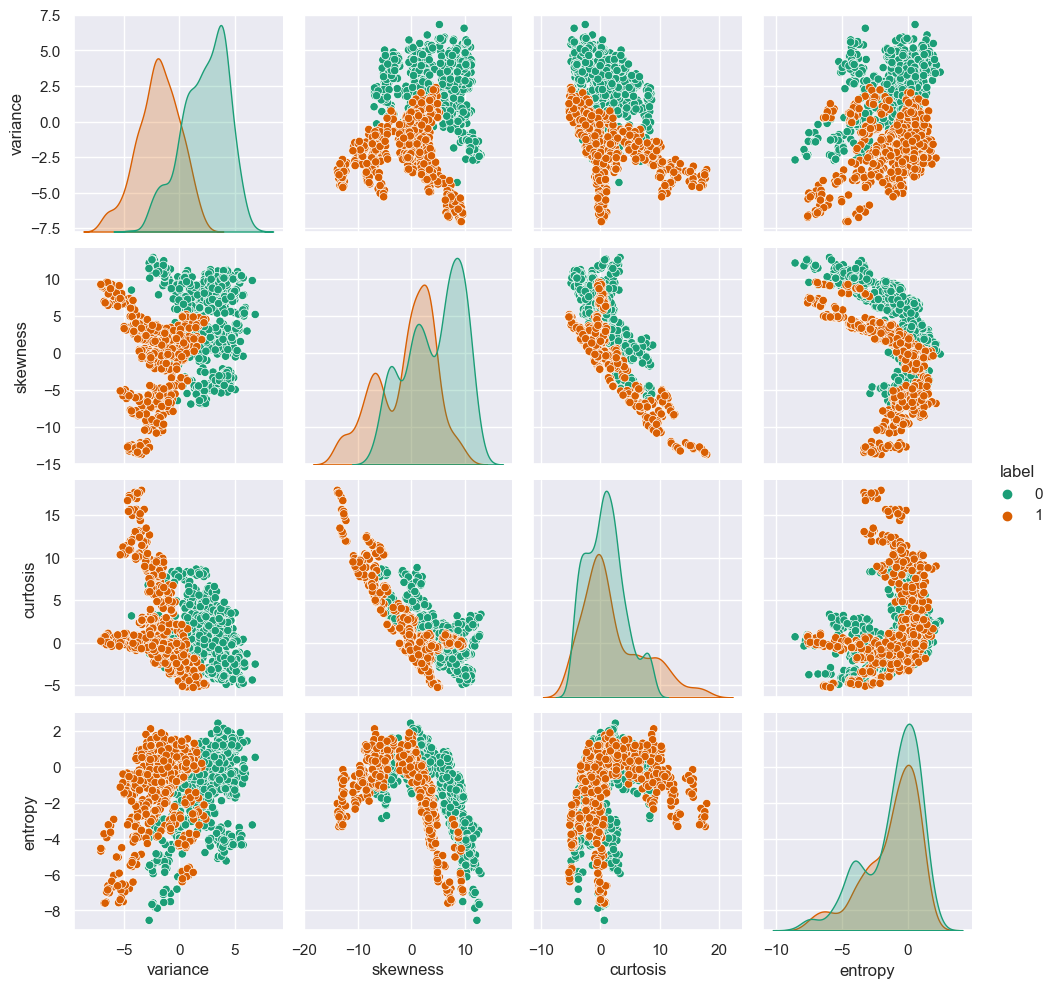

In [17]:
# Plot the scatterplot for each pair of features
sns.pairplot(data, hue='label',palette='Dark2')

From the scatter plot above, these two class are separated only in variance and entropy I use "variance" and "entropy" as the predictors.

To have an overall impression of the features distribution:

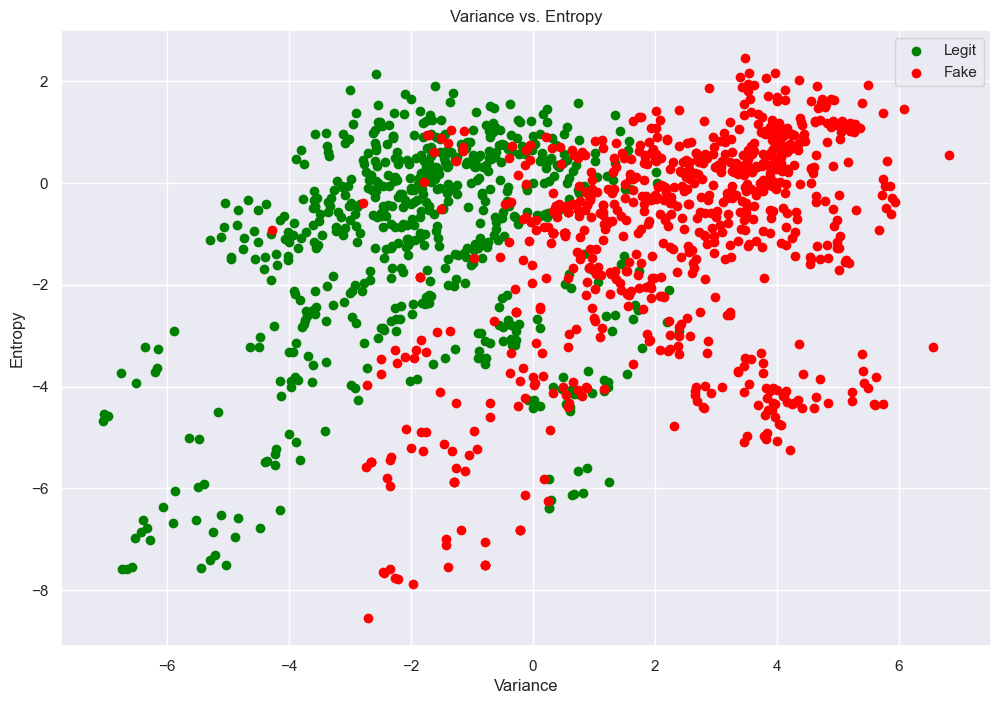

In [18]:
# Subset the data points of legit currency
df_legit = data.loc[data["label"] == 1]

# Subset the data points of fake currency
df_fake = data.loc[data["label"] == 0]

# Plot the scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(df_legit["variance"], df_legit["entropy"], label = "Legit", color = 'green')
plt.scatter(df_fake["variance"], df_fake["entropy"], label = "Fake", color = 'red')
plt.xlabel("Variance")
plt.ylabel("Entropy")
plt.title("Variance vs. Entropy")
plt.legend()

In [20]:
# Extracting features from banknote dataset, and converting to numpy array
X = data[["variance", "entropy"]].to_numpy()

# Extract out labels, and convert to numpy array
y = data[['label']].to_numpy()

# Change labels to match our desired 1 or -1 labels
for i, label in enumerate(y):
    if label == 1:
        y[i] = 1.0
    elif label == 0:
        y[i] = -1.0

Now, I need to make

$$\bar X^i=\begin{bmatrix}
X^i_1\\ 
\vdots\\ 
X^i_n \\ 
1.0
\end{bmatrix}$$

The bias term ($1.0$) should be added to the previous X array.

In [21]:
# Build the desired X_bar, add ones to the previous X array
X_bar = []
for x in X:
    X_bar.append(np.append(x, np.ones(1)))
X_bar = np.array(X_bar)
X_bar[:5]

array([[ 3.6216 , -0.44699,  1.     ],
       [ 4.5459 , -1.4621 ,  1.     ],
       [ 3.866  ,  0.10645,  1.     ],
       [ 3.4566 , -3.5944 ,  1.     ],
       [ 0.32924, -0.9888 ,  1.     ]])

---

### Build the Algorithm

First, to define the activation function. We use sign function as the activation function. 

$$\hat y^i=sign(w^T \bar X^i)=\left\{\begin{matrix}
1, \space\space w^T\bar X^i>0\\ 
-1,\space\space w^T\bar X^i<0
\end{matrix}\right.$$

In [22]:
# Define sign function
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0 :
        return 1.0
    else:
        return -1.0

Secondly, to define the loss function.

$$L(w, \bar X^i)=\frac{1}{2}\sum_{i=1}^n(\hat y^i-y^i)^2 = \frac{1}{2}\sum_{i=1}^n\left (sign(w^T \bar X^i)-y^i\right)^2$$

In [23]:
# Define the loss function
def L(w, features = X_bar, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))    

To define the approximate gradient:

#### The Gradient Approximation Update Rule

For the loss function, we cannot get a derivation of the sign function, and thus, we define an approximation of the gradient.

The **approximate** gradient of the loss function is

$$\triangledown L(w, \bar X^i)=\left (sign(w^T \bar X^i)-y^i\right)\bar X_i$$


In [30]:
# Define the approximate gradient
def grad_approx(w, x, y):
    return (sign(w, x) - y)*x

### Run the algorithm

Set the epochs and the learning rate, and randomly initiate the weights:

In [26]:
# Set epochs
epochs = 1000

# Set the learning rate
alpha = 0.5

# Randomize intial weights
w = np.random.rand(3)

In [27]:
# Check the loss before implementing
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")

The Loss before implementing stochastic approx gradient descent = [2312.]


To update the weights,

$$w_{n+1}=w_n - \alpha \triangledown L(w, \bar X^i)$$
where $\alpha$ is the learning rate.

In the meantime, We also calculate the loss for every epoch.


In [31]:
losses = []
for _ in range(epochs):
    for _ in range(2054):
        # Randomly pickup an index of sample
        random_index = np.random.randint(len(y))
        # Update the weights
        w = w - alpha*grad_approx(w, X_bar[random_index], y[random_index])
    # Calculate loss for every epoch
    losses.append(L(w))

Text(0.5, 1.0, 'Loss for Every Epoch')

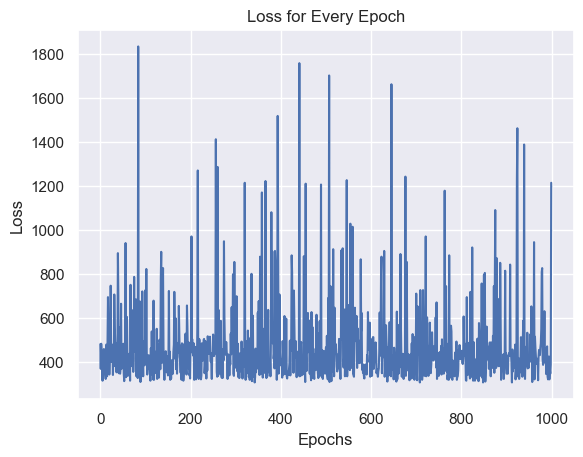

In [32]:
# Plot the loss for every epoch
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss for Every Epoch")

From the plot of the loss for every epoch, the loss converge to 0 very quickly.

Finally, we can calculate the linear line to separate the two species regarding to "flipper_length_mm" and "bill_depth_mm".

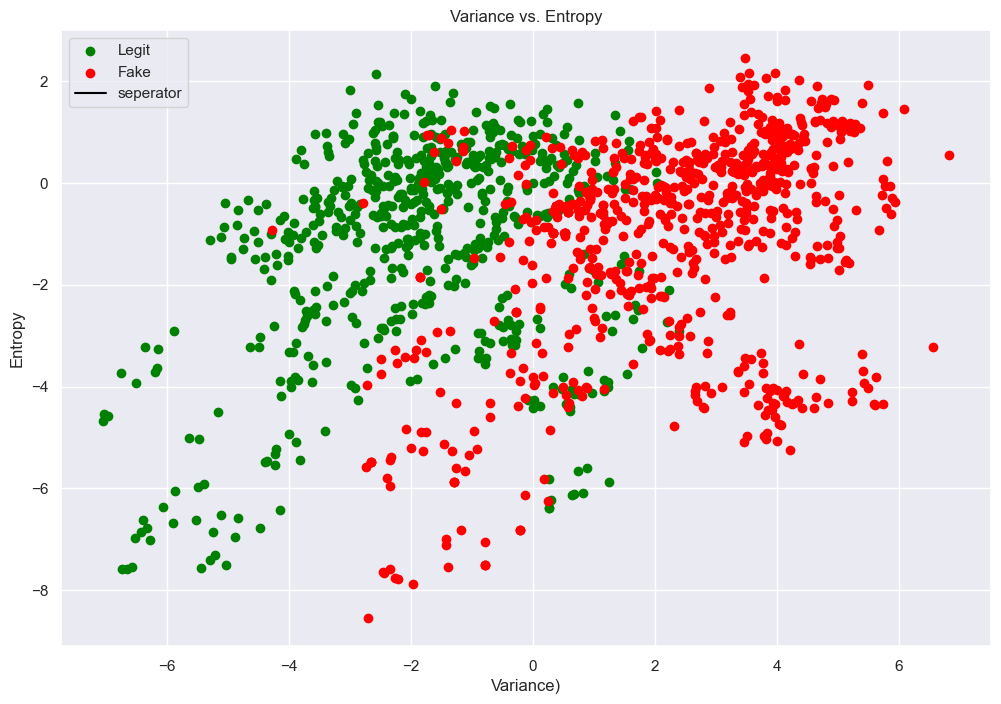

In [33]:
# Define the predicted line
domain = np.arange(-7, 7, -1)
line = [(w[0]*x + w[2])/-w[1] for x in domain]

# Plot the scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(df_legit["variance"], df_legit["entropy"], label = "Legit", color = 'green')
plt.scatter(df_fake["variance"], df_fake["entropy"], label = "Fake", color = 'red')

# Plot the predicted line
plt.plot(domain,
         line,
         label = 'seperator',
         color = 'black')

plt.xlabel("Variance)")
plt.ylabel("Entropy")
plt.title("Variance vs. Entropy")
plt.legend()

### Conclusion

We can find that the predicted line do not separate the two categories well, suggesting that our algorithm works well!